In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\Abhi9\Downloads\iris_synthetic_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  3000 non-null   float64
 1   sepal width   3000 non-null   float64
 2   petal length  3000 non-null   float64
 3   petal width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [3]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df['label']=le.fit_transform(df[['label']])
original_label={'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2}
df['label']=[original_label[i] for i in df['label']] #LABEL ENCODING

In [4]:
df.head(10)

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,0
1,5.3,4.1,1.5,0.1,0
2,4.8,3.1,1.5,0.2,0
3,5.2,3.7,1.5,0.2,0
4,4.9,3.0,1.5,0.3,0
5,5.1,3.7,1.5,0.4,0
6,5.2,3.7,1.5,0.3,0
7,5.4,3.4,1.6,0.2,0
8,4.9,3.1,1.5,0.1,0
9,5.2,3.7,1.5,0.3,0


In [5]:
df.isnull().any().sum()#CHECKING nan VALUE

0

In [6]:
df.columns=df.columns.str.strip()

In [7]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'label'], dtype='object')

In [8]:
df.head(10)

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,0
1,5.3,4.1,1.5,0.1,0
2,4.8,3.1,1.5,0.2,0
3,5.2,3.7,1.5,0.2,0
4,4.9,3.0,1.5,0.3,0
5,5.1,3.7,1.5,0.4,0
6,5.2,3.7,1.5,0.3,0
7,5.4,3.4,1.6,0.2,0
8,4.9,3.1,1.5,0.1,0
9,5.2,3.7,1.5,0.3,0


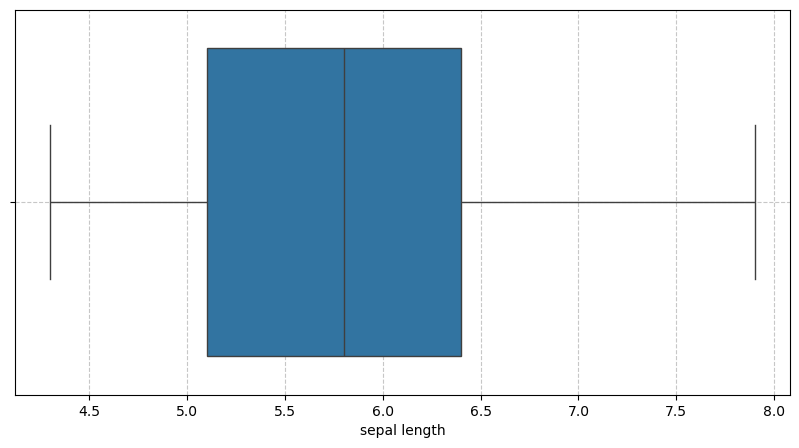

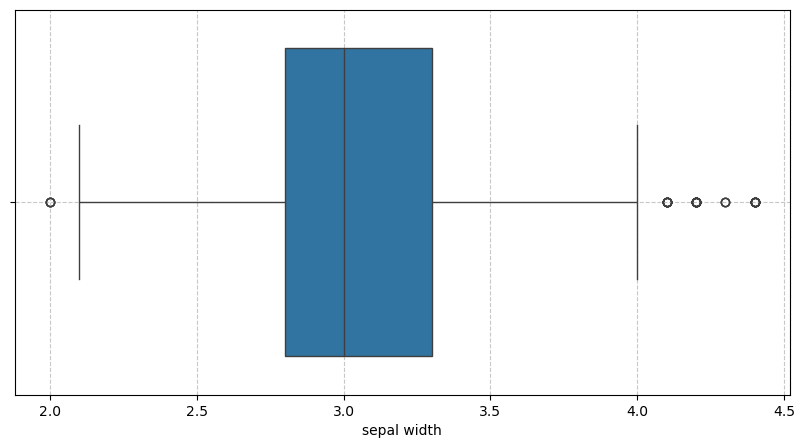

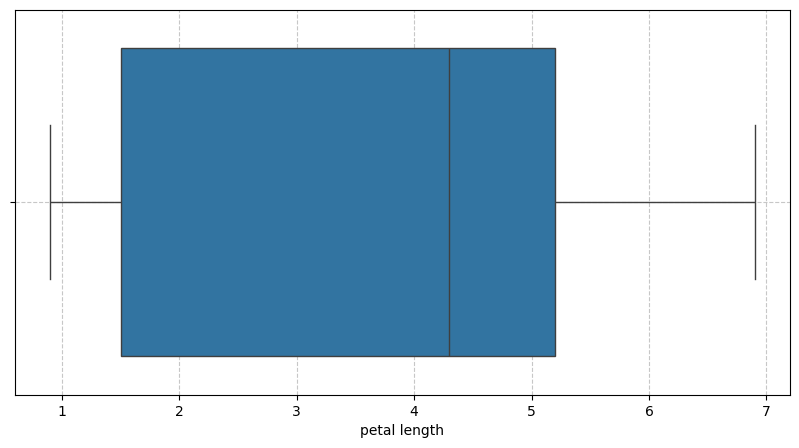

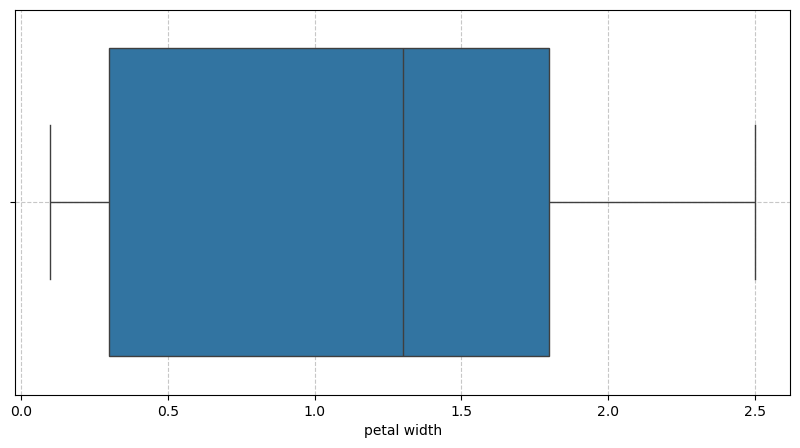

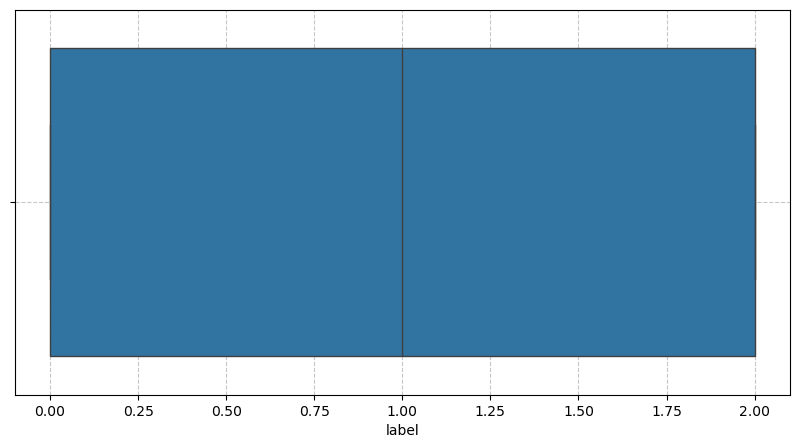

In [9]:
for i in df.columns: #CHECKING FOR OUTLIER
    plt.figure(figsize=(10,5))
    sns.boxplot(x=i,data=df)
    plt.xlabel(i)
    # plt.ylabel('label')
    plt.grid(axis='both',linestyle='--',alpha=0.7)
    plt.show()

C:\Users\Abhi9\AppData\Local\Temp\ipykernel_21684\2658004759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal length'])#CHECKING FOR DISTRIBUTION TYPES


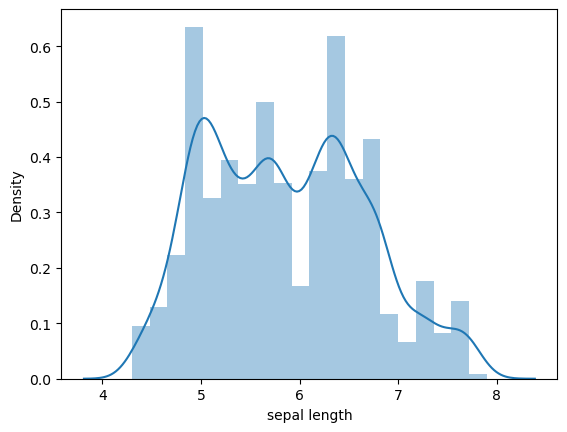

In [10]:
sns.distplot(df['sepal length'])#CHECKING FOR DISTRIBUTION TYPES
plt.show()

In [11]:
# from sklearn.preprocessing import MinMaxScaler
# ss=MinMaxScaler()
# df['sepal length']=ss.fit_transform(df[['sepal length']])
df


,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,0
1,5.3,4.1,1.5,0.1,0
2,4.8,3.1,1.5,0.2,0
3,5.2,3.7,1.5,0.2,0
4,4.9,3.0,1.5,0.3,0
...,...,...,...,...,...
2995,7.2,3.6,6.0,2.5,2
2996,7.3,3.0,6.2,2.1,2
2997,6.9,3.2,5.7,2.3,2
2998,7.5,2.8,6.0,2.0,2


In [12]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'label'], dtype='object')

In [13]:
for col in df.columns :# OUTLIER REMOVAL BY QUANTILE
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    df = df[(df[col] >= Q1 - 1.5 * iqr) & (df[col] <= Q3 + 1.5 * iqr)]
    print(df[col])
    


0       5.2
1       5.3
2       4.8
3       5.2
4       4.9
       ... 
2995    7.2
2996    7.3
2997    6.9
2998    7.5
2999    6.7
Name: sepal length, Length: 3000, dtype: float64
0       3.8
2       3.1
3       3.7
4       3.0
5       3.7
       ... 
2995    3.6
2996    3.0
2997    3.2
2998    2.8
2999    3.0
Name: sepal width, Length: 2959, dtype: float64
0       1.5
2       1.5
3       1.5
4       1.5
5       1.5
       ... 
2995    6.0
2996    6.2
2997    5.7
2998    6.0
2999    5.3
Name: petal length, Length: 2959, dtype: float64
0       0.3
2       0.2
3       0.2
4       0.3
5       0.4
       ... 
2995    2.5
2996    2.1
2997    2.3
2998    2.0
2999    2.3
Name: petal width, Length: 2959, dtype: float64
0       0
2       0
3       0
4       0
5       0
       ..
2995    2
2996    2
2997    2
2998    2
2999    2
Name: label, Length: 2959, dtype: int64


In [14]:
from sklearn.preprocessing import StandardScaler # ALL DATAPOINTS ARE CHANGED WITH (DATAPOINT-MEAN)/STANDARD DEVIATION
n=StandardScaler()
for col in df.columns :
    if col=='label':
        break
    df[col]=n.fit_transform(df[[col]])

In [15]:
df # NEGATIVE LENGTH SEEMS HORRIBLE! NO ISSUE!!!! AS FEATURE SCALLING IS DONE TO GET MEAN=0 AND SD=1 

,sepal length,sepal width,petal length,petal width,label
0,-0.829920,1.946931,-1.316501,-1.195845,0
2,-1.324603,0.157413,-1.316501,-1.328240,0
3,-0.829920,1.691286,-1.316501,-1.328240,0
4,-1.200933,-0.098232,-1.316501,-1.195845,0
5,-0.953591,1.691286,-1.316501,-1.063451,0
...,...,...,...,...,...
2995,1.643498,1.435640,1.263584,1.716832,2
2996,1.767169,-0.098232,1.378254,1.187254,2
2997,1.272485,0.413059,1.091578,1.452043,2
2998,2.014511,-0.609523,1.263584,1.054860,2


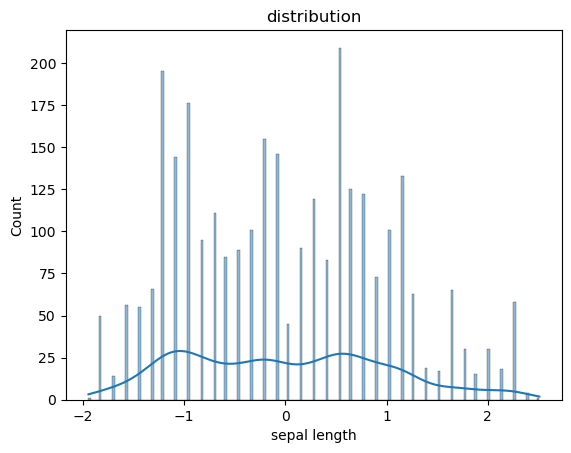

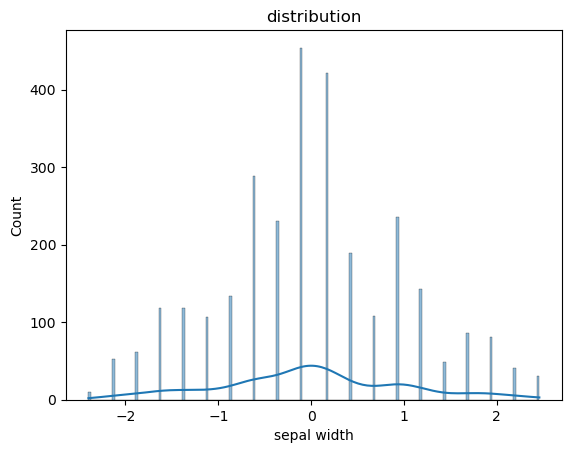

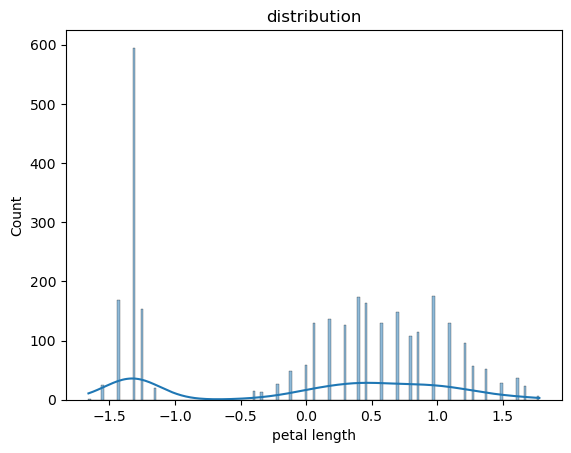

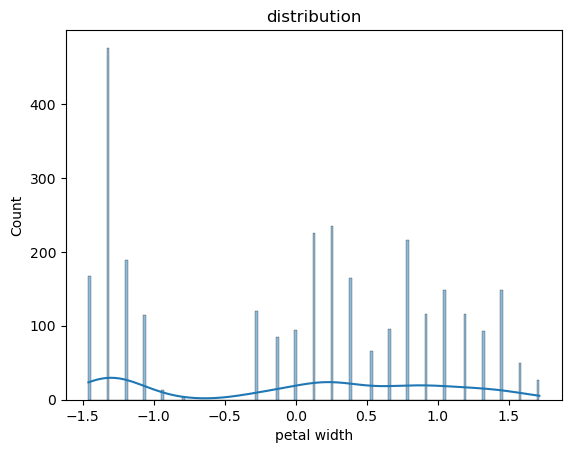

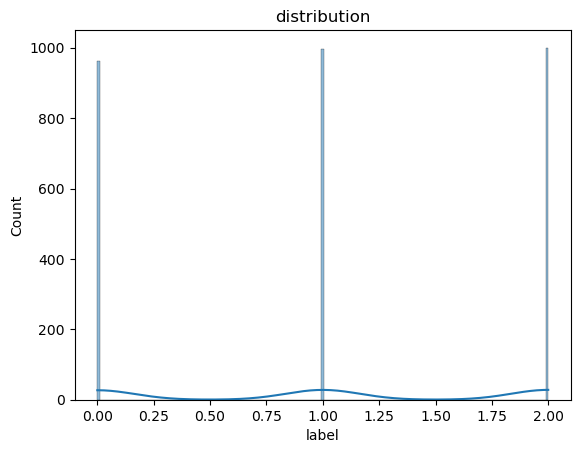

In [16]:
for col in df.columns: #DATA VISUALISATION
    sns.histplot(data=df[col],bins=173,kde=True).set(title='distribution') 
    plt.show()

In [17]:
from sklearn.model_selection import train_test_split #IN ORDER TO CHECK ACCURACY AFTER TRAINING THE MODEL
input=df.iloc[:,:-1]
output=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.25)
x_train=x_train.values
y_train=y_train.values

In [18]:
x_train.shape
# y_train.unique()

(2219, 4)

In [19]:
y_train_one_hot = np.eye(3)[y_train] # FOR BETTER CALCULATION


In [20]:
def initialize_w_b(input_feature,hidden_neuron,output_neuron): # W,B ARE INITIALIZED. I HAVE USED ONLY ONE HIDDEN LAYER AND THE OUPUT LAYER
    np.random.seed(42)
    w1=np.random.randn(input_feature,hidden_neuron)# For hidden layer 1
    b1=np.zeros((1,hidden_neuron))
    w2=np.random.randn(hidden_neuron,output_neuron)#For hidden layer 2 or output layer
    b2=np.zeros((1,output_neuron))
    return w1,b1,w2,b2

In [21]:
def relu(z): # DEFINED Rectified Linear Unit
    return np.maximum(0,z)
def softmax(z): # DEFINED SOFTMAX FOR MULTICLASS CLSSIFICATION
    exp_z=np.exp(z-np.max(z,axis=1,keepdims=True))
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)


In [22]:
def forward_prop(x,w1,b1,w2,b2):#THE BEGINNING
    z1=np.dot(x,w1)+b1
    a1=relu(z1)
    z2=np.dot(a1,w2)+b2
    a2=softmax(z2)
    return a1,a2

In [23]:
def loss(y_hat,y):#SPARSE CATEGORICAL ENTROPY
    return -np.mean(y*np.log(y_hat+1e-6))


In [24]:
def back_prop(w1,w2,b1,b2,y,x): # dz2,dw2,db2,dz1,dw1,db1 calculated IN PEN & PAPER
    m=x.shape[0]
    a1,a2 = forward_prop(x, w1, b1, w2, b2)
    dz2=a2-y
    dw2=np.dot(a1.T,dz2)/m
    db2=np.sum(dz2,axis=0,keepdims=True)/m
    dz1=np.dot(dz2,w2.T)*(a1>0)  # Derivative of ReLU
    dw1=np.dot(x.T,dz1)/m
    db1=np.sum(dz1,axis=0,keepdims=True)/m
    w1-=0.01*dw1
    b1-=0.01*db1
    w2-=0.01*dw2
    b2-=0.01*db2
    return w1,b1,w2,b2



In [32]:
x_train.shape

(2219, 4)

In [ ]:
input_feature=x_train.shape[1]
hidden_neuron=5 #ADDING 5 NEURONS IN FIRST LAYER
output_neuron=3 
epochs=100
# train_loss=[]
w1,b1,w2,b2=initialize_w_b(input_feature,hidden_neuron,output_neuron)
for i in range(epochs):
   a1,a2=forward_prop(x_train,w1,b1,w2,b2)
   losses=loss(a2,y_train_one_hot)
   # train_loss.append(losses)
   w1,b1,w2,b2=back_prop(w1,w2,b1,b2,y_train_one_hot,x_train)
   if i%100==0:
      print(f"computed loss={losses}")
   



computed loss=1.596751610565164


In [35]:
y_pred_train= forward_prop(x_train,w1,b1,w2,b2)
len(y_pred_train)

2

In [36]:
y_pred_train

(array([[1.93235988, 2.58753728, 0.        , 0.        , 4.70110353],
        [0.        , 0.        , 1.77826081, 0.92959108, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 1.52347049, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.05941195, 0.        , 0.        , 0.        , 0.        ]]),
 array([[9.72835848e-01, 3.63175692e-05, 2.71278340e-02],
        [3.03797579e-02, 2.61970155e-01, 7.07650087e-01],
        [3.26735579e-01, 3.47870140e-01, 3.25394280e-01],
        ...,
        [7.77619045e-02, 6.66654164e-01, 2.55583932e-01],
        [3.26735579e-01, 3.47870140e-01, 3.25394280e-01],
        [3.50505618e-01, 3.34561076e-01, 3.14933306e-01]]))

In [26]:
input_feature=x_test.shape[1]
y_test_one_hot=np.eye(3)[y_test]
a1,a2=forward_prop(x_test,w1,b1,w2,b2)
test_losses=loss(a2,y_test_one_hot)
w1,b1,w2,b2=back_prop(w1,w2,b1,b2,y_test_one_hot,x_test)
print(losses)

0.2682408949341672


In [27]:
pred_label_=softmax(a2)
predicted_class=np.argmax(pred_label_,axis=1)
predicted_class

array([1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0,
       1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_class)
print("Accuracy:", accuracy)


Accuracy: 0.5527027027027027


In [29]:
original_label={0:'Iris-setosa', 1:'Iris-versicolor',2:'Iris-virginica'} #CHANGED THE PREDICTION TO IT'S ORIGINAL CLASS
predicted_class=[original_label[i] for i in predicted_class]

In [30]:
predicted_class

['Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted_class))


ValueError: Mix of label input types (string and number)